Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.0220 - loss: 3.6549 - val_accuracy: 0.0130 - val_loss: 3.4071
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0514 - loss: 3.2211 - val_accuracy: 0.2790 - val_loss: 3.0020
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3647 - loss: 2.8147 - val_accuracy: 0.3840 - val_loss: 2.6138
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4126 - loss: 2.4354 - val_accuracy: 0.5090 - val_loss: 2.2767
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5311 - loss: 2.1267 - val_accuracy: 0.5660 - val_loss: 2.0296
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5851 - loss: 1.8978 - val_accuracy: 0.5700 - val_loss: 1.8419
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6171 - loss: 1.7144 - val_accuracy: 0.6200 - val_loss: 1.6821
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6371 - loss: 1.5524 - val_accuracy: 0.6180 - v

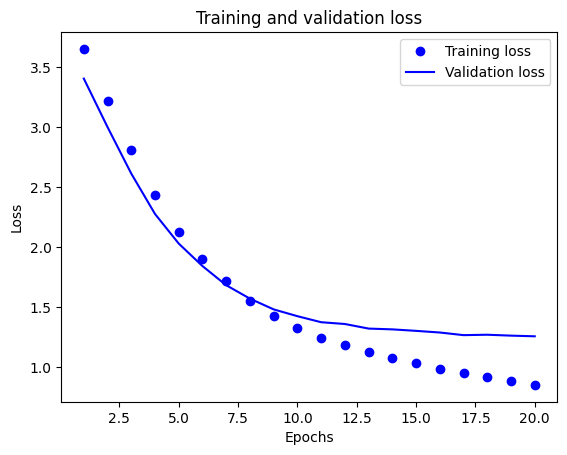

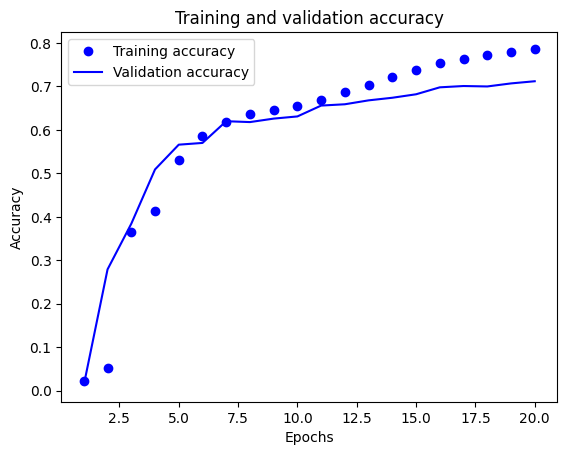

In [5]:
import numpy as np

#Loading the Reuters dataset
# **************************
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

len(train_data)
len(test_data)
train_data[10]

# Decoding newswires back to text
# *******************************
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

train_labels[10]


# Preparing the data
# Encoding the input data
# ***********************
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Encoding the labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


# Building your model
# Model definition
# *******************
from tensorflow import keras
from tensorflow.keras import layers

nn_layer_1 = 64
nn_layer_2 = 4


model = keras.Sequential([
    layers.Dense(nn_layer_1, activation="relu"),
    layers.Dense(nn_layer_2, activation="relu"),
    layers.Dense(46, activation="softmax")
])

# Compiling the model
# *******************
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


# Validating your approach
# Setting aside a validation set
# ******************************


x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

# Training the model
# *******************
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# Plotting the training and validation loss
# *****************************************
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plotting the training and validation accuracy
# *********************************************
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Retraining a model from scratch
# *******************************


# model = keras.Sequential([
#   layers.Dense(nn_layer_1, activation="relu"),
#   layers.Dense(nn_layer_2, activation="relu"),
#   layers.Dense(46, activation="softmax")
# ])
# model.compile(optimizer="rmsprop",
#               loss="categorical_crossentropy",
#               metrics=["accuracy"])
# model.fit(x_train,
#           y_train,
#           epochs=9,
#           batch_size=512)
# results = model.evaluate(x_test, y_test)
# results

# import copy
# test_labels_copy = copy.copy(test_labels)
# np.random.shuffle(test_labels_copy)
# hits_array = np.array(test_labels) == np.array(test_labels_copy)
# hits_array.mean()

# # Generating predictions on new data
# # **********************************
# predictions = model.predict(x_test)
# predictions[0].shape
# np.sum(predictions[0])
# np.argmax(predictions[0])















Note: you may need to restart the kernel to use updated packages.
Vocabulary (word -> index mapping):
{'i': 9, 'like': 11, 'watching': 21, 'funny': 6, 'movies': 13, 'enjoy': 3, 'comedy': 2, 'viewing': 20, 'hearing': 8, 'songs': 17, 'football': 5, 'is': 10, 'a': 0, 'great': 7, 'sport': 18, 'playing': 16, 'outside': 14, 'players': 15, 'are': 1, 'very': 19, 'fit': 4, 'matches': 12}
Shape of encoded documents: (8, 22)
Type: <class 'scipy.sparse._csr.csr_matrix'>
One-hot encoded documents:
[[0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1]
 [0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0]
 [0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1]]
Training data shapes:
Input (context) shape: (40, 22)
Output (center word) shape: (40, 22)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 22)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Dense)         │ (None, 3)              │            69 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 22)             │            88 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157 (628.00 B)

 Trainable params: 157 (628.00 B)

 Non-trainable params: 0 (0.00 B)

Training the Word2Vec model...
Training completed!
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Embedding weights shape: [(22, 3), (3,)]


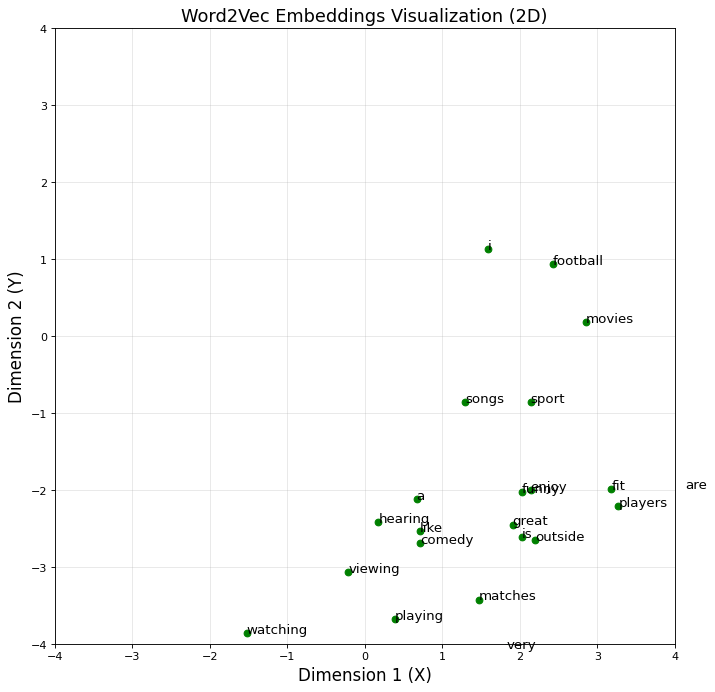


Calculating similarity between 'movie' and 'football':
Embedding for 'movie': [ 0.95187634 -1.1727316  -0.87714195]
Embedding for 'football': [ 2.4292028   0.92886186 -0.8643092 ]

=== SIMILARITY METRICS ===
Dot product: 1.9811168909072876
Magnitude of movie: 1.7466384172439575
Magnitude of football: 2.740591287612915
Cosine Similarity: 0.4138689339160919
Euclidean Distance: 2.568920612335205
Squared Euclidean Distance: 6.599352836608887

=== MANUAL CALCULATION EXAMPLE ===
For manual calculation, use these formulas:
Cosine Similarity = (A₁×B₁ + A₂×B₂ + ...) / (√(A₁² + A₂² + ...) × √(B₁² + B₂² + ...))
Euclidean Distance = √((A₁-B₁)² + (A₂-B₂)² + ...)
Where A₁, A₂... are coordinates of first word and B₁, B₂... are coordinates of second word


In [7]:
#https://github.com/nitwmanish/An-Intuitive-Introduction-Of-Word2Vec-By-Building-A-Word2Vec-From-Scratch/blob/master/An-Intuitive-Introduction-Of-Word2Vec-By-Building-A-Word2Vec-From-Scratch.ipynb

# Install required library for text processing
%pip install scikit-learn

import numpy as np

# ===== TRAINING DATA DEFINITION =====
# TODO FOR ASSIGNMENT: Replace these 8 sentences with 10 sentences of exactly 5 words each
# Currently these sentences have varying lengths (4-6 words)
# You need exactly 10 sentences with exactly 5 words each in Hebrew or English
docs = ["I like watching funny movies", "I enjoy watching comedy movies", "I like viewing comedy movies", "I like hearing funny songs" ,
        "football is a great sport", "I like playing football outside",  "football players are very fit", "I enjoy watching football matches",
        ]

# IMPORTANT: This parameter defines the expected sentence length
# TODO FOR ASSIGNMENT: Keep this as 5 since your sentences should be exactly 5 words
sentance_length = 5

# ===== VOCABULARY CREATION AND ONE-HOT ENCODING =====
# Create a vocabulary from all unique words in the documents
# CountVectorizer creates a mapping from words to indices
from sklearn.feature_extraction.text import CountVectorizer

# min_df=0.0 means include all words (even if they appear only once)
# token_pattern defines what constitutes a word (letters and numbers)
vectorizer = CountVectorizer(min_df=0.0, token_pattern=r"\b\w+\b")
vectorizer.fit(docs)  # Build vocabulary from the documents
print("Vocabulary (word -> index mapping):")
print(vectorizer.vocabulary_)

# Transform documents into one-hot encoded vectors
# Each document becomes a vector where 1 indicates word presence, 0 indicates absence
vector = vectorizer.transform(docs)
print("Shape of encoded documents:", vector.shape)  # (num_documents, vocabulary_size)
print("Type:", type(vector))  # Sparse matrix for memory efficiency
print("One-hot encoded documents:")
print(vector.toarray())  # Convert to dense array for display

# ===== SKIP-GRAM TRAINING DATA PREPARATION =====
# Skip-gram model: given a center word, predict surrounding context words
# For each word in each sentence, we create training pairs:
# Input: center word, Output: context words (all other words in the sentence)

x = []  # Will store context words (input to the model)
y = []  # Will store center words (target output)

# Process each document
for i in range(len(docs)):
    words_in_doc = docs[i].split()
    # Process each word in the document as a potential center word
    for j in range(len(words_in_doc)):
        t_x = []  # Context words for this center word
        t_y = []  # Center word
        
        # Create context by including all other words in the sentence
        for k in range(sentance_length):
            if j == k:  # This is the center word
                t_y.append(words_in_doc[k])
            else:  # These are context words
                if k < len(words_in_doc):  # Make sure we don't go out of bounds
                    t_x.append(words_in_doc[k])
        
        x.append(t_x)  # Add context words
        y.append(t_y)  # Add center word

# Convert lists of words back to strings for vectorization
x2 = []  # Context words as strings
y2 = []  # Center words as strings
for i in range(len(x)):
    x2.append(' '.join(x[i]))  # Join context words into a single string
    y2.append(' '.join(y[i]))  # Join center word (single word) into string

# ===== VECTORIZATION OF TRAINING DATA =====
# Convert word strings back to one-hot encoded vectors
vector_x = vectorizer.transform(x2)  # Context words as vectors
vx = vector_x.toarray()  # Convert to dense arrays

vector_y = vectorizer.transform(y2)  # Center words as vectors  
vy = vector_y.toarray()

print("Training data shapes:")
print("Input (context) shape:", vx.shape)
print("Output (center word) shape:", vy.shape)

# ===== NEURAL NETWORK MODEL DEFINITION =====
# Get vocabulary size for input/output layer dimensions
vocSize = len(vectorizer.vocabulary_)

# TODO FOR ASSIGNMENT: This is where you change the embedding dimension
# For part 1: keep hidden_layer_size = 2 (for 2D visualization)
# For part 2: change to hidden_layer_size = 3 (for 3D embeddings)
hidden_layer_size = 3  # This determines the dimension of word embeddings

# Clear any previous Keras sessions
from keras.models import Sequential
from keras.layers import Dense
from keras import backend
backend.clear_session()

# ===== MODEL ARCHITECTURE =====
# Create a simple feedforward neural network
# Architecture: Input Layer -> Hidden Layer (Embeddings) -> Output Layer

from keras.layers import Input
from keras.models import Model

# Define input layer: one-hot encoded words (vocabulary size)
input_layer = Input(shape=(vocSize,))

# Hidden layer: this will learn the word embeddings
# Linear activation because we want raw embedding values
hidden_layer = Dense(hidden_layer_size, activation='linear', name='embedding_layer')(input_layer)

# Output layer: predicts context words using sigmoid activation
# Sigmoid because this is essentially a multi-label classification problem
output_layer = Dense(vocSize, activation='sigmoid')(hidden_layer)

# Create the complete model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile with binary crossentropy (suitable for multi-label classification)
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

# ===== MODEL TRAINING =====
# Train the model to learn word embeddings
# epochs=1000: number of training iterations (you may need to adjust this)
# batch_size=4: number of samples processed together
# verbose=0: suppress training output for cleaner display
print("Training the Word2Vec model...")
model.fit(vx, vy, epochs=1000, batch_size=4, verbose=0)
print("Training completed!")

# Test the model predictions
predictions = model.predict(vector_x)

# ===== EXTRACT WORD EMBEDDINGS =====
# The hidden layer weights contain our learned word embeddings
# We create a separate model to extract just the hidden layer output

# Create model that outputs only the embedding layer
intermediate_layer_model = Model(inputs=model.input, outputs=hidden_layer)

# Get the weights (these represent the learned embeddings)
weights = intermediate_layer_model.get_weights()
print("Embedding weights shape:", [w.shape for w in weights])

# ===== GENERATE WORD VECTORS FOR VISUALIZATION =====
# For each word in vocabulary, get its embedding vector
words = []        # Word names
wordVec = []      # Full embedding vectors
xval = []         # X coordinates (first dimension)
yval = []         # Y coordinates (second dimension)

# Process each word in the vocabulary
for i in range(len(vectorizer.vocabulary_)):
    # Get the word
    word = list(vectorizer.vocabulary_.keys())[i]
    words.append(word)
    
    # Create one-hot encoding for this single word
    one_hot = vectorizer.transform([word]).toarray()
    
    # Get the embedding vector for this word
    embedding = intermediate_layer_model.predict(one_hot, verbose=0)
    wordVec.append(embedding)
    
    # Extract coordinates for plotting
    xval.append(embedding[0][0])  # First dimension
    yval.append(embedding[0][1])  # Second dimension

# ===== VISUALIZATION =====
# Create a 2D plot of the word embeddings
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Set up the plot
figure(figsize=(10, 10), dpi=80)
plt.xlabel("Dimension 1 (X)", fontsize=15)
plt.ylabel("Dimension 2 (Y)", fontsize=15)
plt.xlim([-4, 4])  # Set axis limits
plt.ylim([-4, 4])
plt.title("Word2Vec Embeddings Visualization (2D)", fontsize=16)

# Plot each word as a point with its label
for i in range(len(xval)):
    plt.text(xval[i], yval[i], words[i], fontsize=12)

plt.plot(xval, yval, 'go')  # Green dots for word positions
plt.grid(True, alpha=0.3)   # Add grid for better readability
plt.show()

# ===== SIMILARITY CALCULATIONS =====
# TODO FOR ASSIGNMENT: Change these words to pairs from your vocabulary
# Choose 2 pairs of words that exist in your vocabulary for comparison
w2c = ["movie", "football"]  # Example words - replace with words from your vocabulary

print(f"\nCalculating similarity between '{w2c[0]}' and '{w2c[1]}':")

# Get embedding vectors for the two words
word_vec_a = intermediate_layer_model.predict(vectorizer.transform([w2c[0]]).toarray(), verbose=0)
word_vec_b = intermediate_layer_model.predict(vectorizer.transform([w2c[1]]).toarray(), verbose=0)

print(f"Embedding for '{w2c[0]}':", word_vec_a[0])
print(f"Embedding for '{w2c[1]}':", word_vec_b[0])

# ===== COSINE SIMILARITY CALCULATION =====
# Cosine similarity = (A · B) / (||A|| × ||B||)
# Values closer to 1 indicate higher similarity, closer to -1 indicate dissimilarity

dot_product = np.sum(word_vec_a * word_vec_b)  # A · B
magnitude_a = np.sqrt(np.sum(np.square(word_vec_a)))  # ||A||
magnitude_b = np.sqrt(np.sum(np.square(word_vec_b)))  # ||B||

cosine_similarity = dot_product / (magnitude_a * magnitude_b)

print("\n=== SIMILARITY METRICS ===")
print(f"Dot product: {dot_product}")
print(f"Magnitude of {w2c[0]}: {magnitude_a}")
print(f"Magnitude of {w2c[1]}: {magnitude_b}")
print(f"Cosine Similarity: {cosine_similarity}")

# ===== EUCLIDEAN DISTANCE CALCULATION =====
# Euclidean distance = √(Σ(A_i - B_i)²)
# Smaller values indicate higher similarity

euclidean_distance = np.sqrt(np.sum(np.square(word_vec_a - word_vec_b)))
print(f"Euclidean Distance: {euclidean_distance}")

# Alternative calculation (without square root - squared Euclidean distance)
squared_euclidean = np.sum(np.square(word_vec_a - word_vec_b))
print(f"Squared Euclidean Distance: {squared_euclidean}")

print("\n=== MANUAL CALCULATION EXAMPLE ===")
print("For manual calculation, use these formulas:")
print("Cosine Similarity = (A₁×B₁ + A₂×B₂ + ...) / (√(A₁² + A₂² + ...) × √(B₁² + B₂² + ...))")
print("Euclidean Distance = √((A₁-B₁)² + (A₂-B₂)² + ...)")
print("Where A₁, A₂... are coordinates of first word and B₁, B₂... are coordinates of second word")

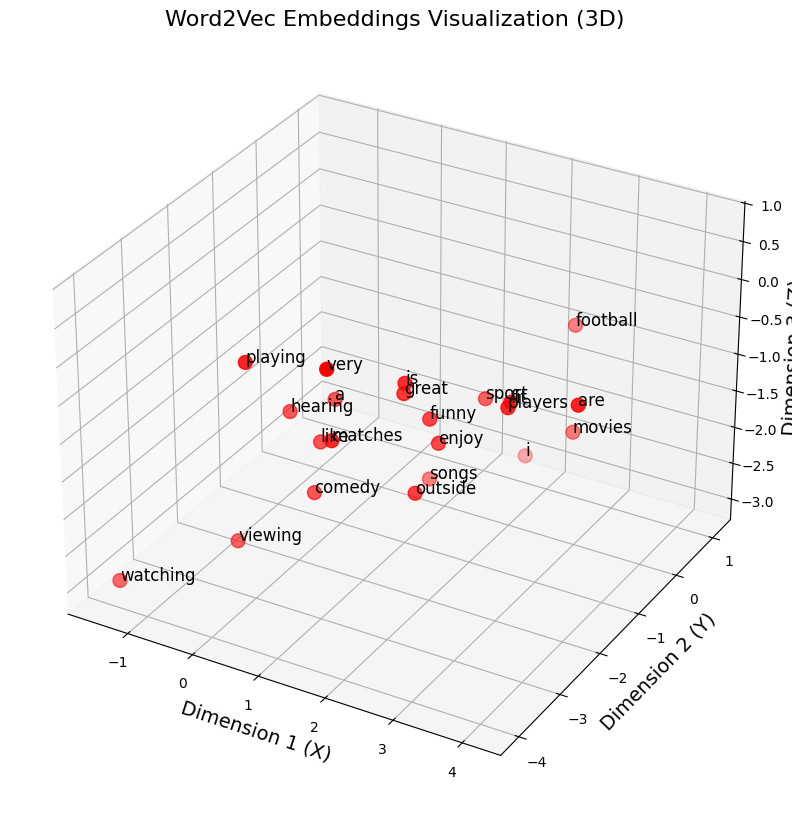


ASSIGNMENT COMPLETION CHECKLIST:
□ 1. Replace 'docs' with 10 sentences of exactly 5 words each
□ 2. Run with hidden_layer_size=2, take screenshot of 2D plot
□ 3. Change to hidden_layer_size=3, uncomment 3D visualization code
□ 4. Choose 2 pairs of words for similarity calculation
□ 5. Calculate similarity/distance both automatically and manually
□ 6. Take screenshots and create Word document with formulas
□ 7. Create ZIP file with: Word doc, graph screenshots, script file

MANUAL CALCULATION TEMPLATE:
------------------------------
Given two word embeddings:
Word A: [a1, a2, a3] (if 3D)
Word B: [b1, b2, b3] (if 3D)

Cosine Similarity = (a1×b1 + a2×b2 + a3×b3) / (√(a1² + a2² + a3²) × √(b1² + b2² + b3²))

Euclidean Distance = √((a1-b1)² + (a2-b2)² + (a3-b3)²)
------------------------------


In [8]:
# ===== 3D VISUALIZATION CODE (USE WHEN hidden_layer_size = 3) =====
# Uncomment this section when you change hidden_layer_size to 3

#"""
# Extract 3D coordinates
zval = []  # Z coordinates (third dimension)
for i in range(len(wordVec)):
    zval.append(wordVec[i][0][2])  # Third dimension

# Create 3D plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot points
ax.scatter(xval, yval, zval, c='red', s=100)

# Add labels for each word
for i in range(len(words)):
    ax.text(xval[i], yval[i], zval[i], words[i], fontsize=12)

ax.set_xlabel('Dimension 1 (X)', fontsize=14)
ax.set_ylabel('Dimension 2 (Y)', fontsize=14) 
ax.set_zlabel('Dimension 3 (Z)', fontsize=14)
ax.set_title('Word2Vec Embeddings Visualization (3D)', fontsize=16)

plt.show()
#"""

# ===== ASSIGNMENT COMPLETION CHECKLIST =====
print("\n" + "="*50)
print("ASSIGNMENT COMPLETION CHECKLIST:")
print("="*50)
print("□ 1. Replace 'docs' with 10 sentences of exactly 5 words each")
print("□ 2. Run with hidden_layer_size=2, take screenshot of 2D plot")
print("□ 3. Change to hidden_layer_size=3, uncomment 3D visualization code")
print("□ 4. Choose 2 pairs of words for similarity calculation")
print("□ 5. Calculate similarity/distance both automatically and manually")
print("□ 6. Take screenshots and create Word document with formulas")
print("□ 7. Create ZIP file with: Word doc, graph screenshots, script file")
print("="*50)

# ===== EXAMPLE OF MANUAL CALCULATION TEMPLATE =====
print("\nMANUAL CALCULATION TEMPLATE:")
print("-" * 30)
print("Given two word embeddings:")
print("Word A: [a1, a2, a3] (if 3D)")
print("Word B: [b1, b2, b3] (if 3D)")
print()
print("Cosine Similarity = (a1×b1 + a2×b2 + a3×b3) / (√(a1² + a2² + a3²) × √(b1² + b2² + b3²))")
print()
print("Euclidean Distance = √((a1-b1)² + (a2-b2)² + (a3-b3)²)")
print("-" * 30)